<a href="https://colab.research.google.com/github/rafaart/DataScienceCO/blob/develop/Unidade_4_ML_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Unidade 4 - Algoritmos de Aprendizado de Máquina I


![](https://i.imgur.com/GkOFPqU.png)


## 🌟 Visão Geral

Esta unidade é dedicada a fornecer uma visão geral abrangente sobre Machine Learning 🤖, com um foco específico nos algoritmos supervisionados. Vamos explorar os algoritmos não paramétricos, que são essenciais para entender como os modelos podem aprender de dados sem a necessidade de uma estrutura paramétrica predefinida. Os tópicos incluem:

- **👥 k-Nearest Neighbors (kNN)**: Um método simples, porém poderoso, que faz previsões com base na proximidade dos pontos de dados mais similares.
- **🌳 Árvores de Decisão**: Uma técnica que utiliza uma estrutura de árvore para fazer decisões e previsões a partir de um conjunto de regras lógicas inferidas dos recursos dos dados.

Este Google Colab foi criado especificamente para o Restic36 - Residência em Software Bahia + Tecnologia + Empreendedorismo 🚀, com o objetivo de facilitar a compreensão prática desses conceitos fundamentais e aplicá-los em cenários reais de desenvolvimento de software e análise de dados.

![](https://imgur.com/dSVECj6.png)

# 📚 Introduçāo ao k-Nearest Neighbors

Nesta aula, vamos explorar o uso do algoritmo k-Nearest Neighbors (kNN) aplicado ao famoso dataset Iris , introduzido por Ronald Fisher em 1936. Vamos percorrer todas as etapas típicas de um projeto de machine learning, desde a análise exploratória dos dados  até a avaliação do modelo treinado .


## 📚 Importação das Bibliotecas

Primeiro, importamos todas as bibliotecas necessárias para nossa análise e visualização dos dados.

### Por que esses pacotes? 🤔
- **pandas 🐼:** Utilizado para manipulação e limpeza dos dados, [pandas](https://pandas.pydata.org/) oferece estruturas de dados e operações para manipular tabelas numéricas e séries temporais. É fundamental para o pré-processamento de dados em projetos de Machine Learning.
- **matplotlib 🎨:** Para visualizar dados e modelos de machine learning, usado para criar gráficos e visualizações de dados de forma estática, animada ou interativa. [matplotlib](https://matplotlib.org/) permite uma personalização extensa, essencial para a apresentação dos resultados das análises.
- **seaborn 📈:** Uma biblioteca de visualização de dados baseada no matplotlib, [seaborn](https://seaborn.pydata.org/) proporciona uma interface de alto nível para desenhos estatísticos atrativos. Ideal para criar gráficos mais complexos de forma simplificada.
- **scikit-learn 🛠️:** Para acessar algoritmos de aprendizado de máquina, [scikit-learn](https://scikit-learn.org/stable/) inclui suporte para classificação com KNeighborsClassifier e árvores de decisão com DecisionTreeClassifier. É uma das bibliotecas mais versáteis e amplamente utilizadas para modelagem preditiva.
- **numpy 🔢:** Usado para suporte de arrays e matrizes multidimensionais, [numpy](https://numpy.org/) juntamente com uma coleção de funções matemáticas para operar com estas estruturas. É a base para quase todos os cálculos numéricos em Python, especialmente em ciência de dados e machine learning.


In [ ]:
# Instalação de pacotes necessários diretamente no ambiente do Colab
!pip install matplotlib scikit-learn pandas seaborn

# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📊 Carregando o Dataset Iris

O dataset Iris é composto por 150 amostras de íris de três espécies diferentes, onde cada amostra tem quatro características: comprimento e largura da sépala, e comprimento e largura da pétala.


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


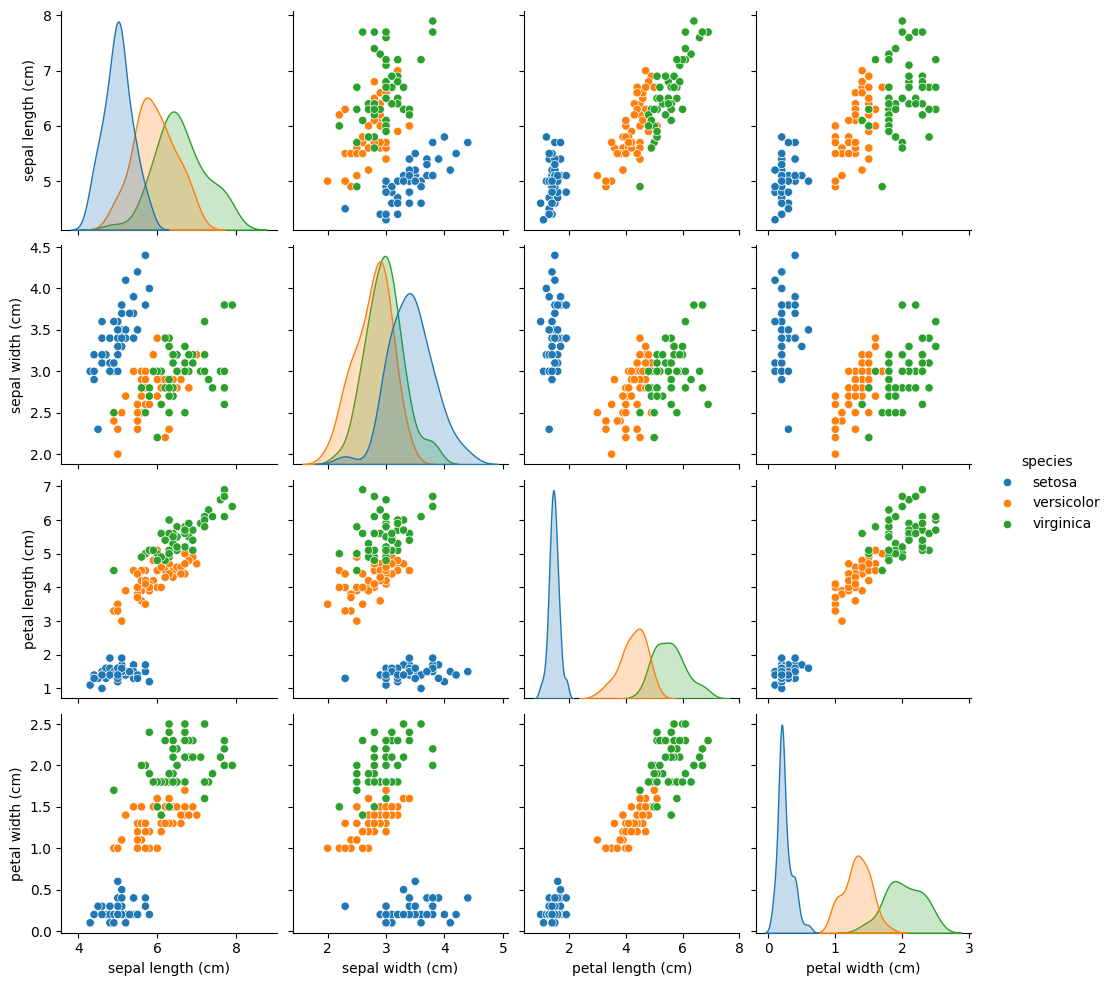

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(iris_df.head())
sns.pairplot(iris_df, hue='species')
plt.show()

### Detalhando o código

#### 🌺 Mapeando Códigos para Nomes de Espécies

```python
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
```
- **`pd.Categorical.from_codes()`** transforma os códigos numéricos de `iris.target` nos nomes de espécies correspondentes de `iris.target_names`. Isso categoriza cada amostra, enriquecendo nosso DataFrame com informações de espécie legíveis.

#### Visualização com Pair Plot 📊

```python
sns.pairplot(iris_df, hue='species')
```
- **`sns.pairplot()`** cria uma grade de gráficos para cada par de características, coloridos por espécie com o parâmetro `hue='species'`.
- Isso nos permite observar facilmente como as características diferem entre as espécies de íris, identificando padrões ou agrupamentos.

## Divisão dos Dados
Dividimos os dados em conjuntos de treino e teste para preparar para o treinamento e avaliação do modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

## Treinamento do Modelo kNN
Instanciamos e treinamos o modelo kNN com os dados de treino.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Avaliação do Modelo
Finalmente, avaliamos o desempenho do modelo usando o conjunto de teste.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



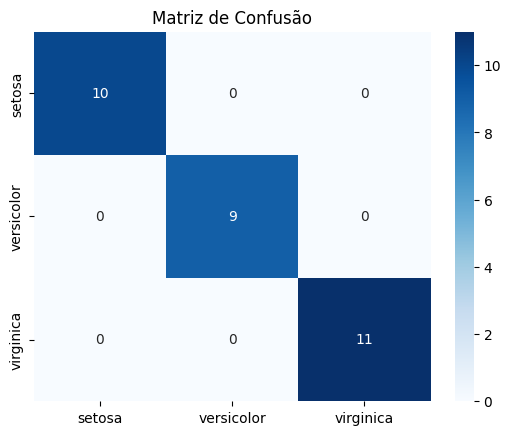

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.show()

## 🔚 Conclusão sobre o k-Nearest Neighbors (kNN) 🌟

Ao longo desta aula, exploramos o algoritmo k-Nearest Neighbors (kNN) 📍, um método simples, porém poderoso, usado tanto em tarefas de classificação. Vamos recapitular alguns dos pontos-chave e desafios associados ao uso do kNN:

### ❗ Desafios
- **Escolha de k (🔢):** Determinar o número ideal de vizinhos, `k`, é crucial, pois valores pequenos podem levar a um modelo que se ajusta demais ao ruído dos dados, enquanto valores grandes podem fazer o modelo ser excessivamente generalizado.
- **Custo Computacional (💻):** O kNN pode ser computacionalmente caro, especialmente com grandes conjuntos de dados, uma vez que calcula a distância entre o ponto de consulta e todos os outros pontos no conjunto de dados.

Esta aula forneceu uma visão sólida sobre como o kNN opera e suas aplicações práticas. Encorajamos você a explorar  diferentes configurações de parâmetros `k` para aprimorar sua compreensão e habilidades práticas com o kNN. Continuem experimentando e aprendendo! 🌱



# 🌳 Introdução às Árvores de Decisão

Árvores de decisão são modelos de aprendizado de máquina supervisionado que podem ser aplicados tanto em tarefas de classificação quanto de regressão. Elas modelam decisões e suas possíveis consequências, incluindo resultados, custos e utilidade.

In [ ]:
# Instalação de pacotes necessários diretamente no ambiente do Colab
!pip install matplotlib scikit-learn pandas seaborn

# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📊 Carregando o Dataset Iris

O dataset Iris é composto por 150 amostras de íris de três espécies diferentes, onde cada amostra tem quatro características: comprimento e largura da sépala, e comprimento e largura da pétala.

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) # Unpack the tuple into two variables
df = pd.DataFrame(diabetes_X, columns=datasets.load_diabetes().feature_names) # Use diabetes_X for feature data

# Exibindo as primeiras linhas do dataframe para entender os dados
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Carregando o dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Exibindo as primeiras linhas do dataframe para entender os dados
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 📝 Preparando os Dados

Agora, vamos dividir os dados em conjuntos de treino e teste. Isso é crucial para testar a performance do nosso modelo em dados não vistos durante o treinamento.

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], test_size=0.3, random_state=42)

## 🌲 Construindo a Árvore de Decisão

Vamos construir nossa árvore de decisão com profundidade máxima de 3 para manter o modelo simples e interpretable.

In [ ]:
# Criando e treinando o modelo de árvore de decisão
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## 🎨 Visualizando a Árvore de Decisão

A visualização nos ajuda a entender como as decisões estão sendo tomadas pelo modelo.

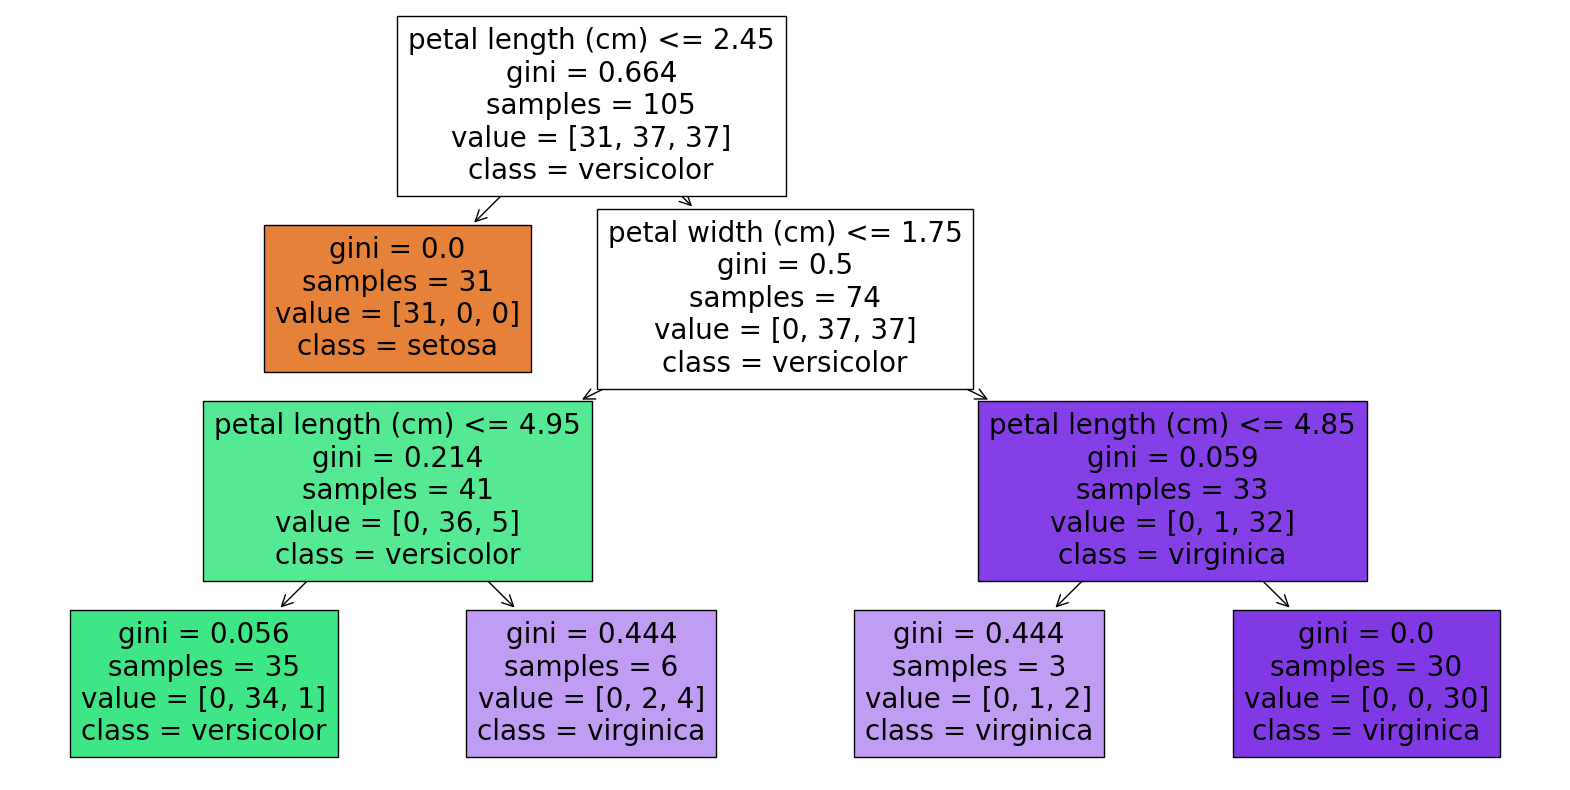

In [ ]:
# Visualizando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

## Explicação da Árvore de Decisão do Dataset Íris 🌼

A árvore de decisão classifica as espécies de Íris em `setosa`, `versicolor` e `virginica` usando medidas das pétalas e sépalas.

### Estrutura da Árvore 🌳

#### Raiz
- **Decisão**: `Petal Length (cm) <= 2.45`
  - **Gini**: 0.664
  - **Amostras**: 105
  - **Distribuição das Classes**: [31, 37, 37] (setosa, versicolor, virginica)
  - **Classe Dominante**: Versicolor

##### Ramificações:
1. **Esquerda**: Gini = 0.0, Todas as amostras são setosa (🟧)
   - **Folha**: Todas as 31 amostras são `setosa`.
   - **Gini**: 0.0

2. **Direita**: Continua para mais decisões (🟩)

#### Nível 2 (Direita da Raiz)
- **Decisão**: `Petal Width (cm) <= 1.75`
  - **Gini**: 0.5
  - **Amostras**: 74
  - **Distribuição das Classes**: [0, 37, 37] (versicolor, virginica)

##### Ramificações:
1. **Esquerda**: Mais divisões baseadas em `Petal Length (cm) <= 4.95`
   - **Gini**: 0.214
   - **Amostras**: 41
   - **Distribuição das Classes**: [0, 36, 5]
     - **Mais Ramificações**: Determina mais sobre versicolor e virginica (🟢)

2. **Direita**: `Petal Length (cm) <= 4.85`
   - **Gini**: 0.059
   - **Amostras**: 33
   - **Distribuição das Classes**: [0, 1, 32]
     - **Folha**: Quase todas as amostras são `virginica` (🟪)

#### Explicação das Folhas 🍃
- Cada folha da árvore representa uma decisão final, chegando a grupos homogêneos:
  - 🟧 **Setosa**: Caracterizada por pétalas mais curtas.
  - 🟢 **Versicolor e Virginica**: Separadas por mais critérios de comprimento e largura das pétalas.


## 🔍 Avaliando o Modelo

Chegou a hora de testar o desempenho do nosso modelo utilizando o conjunto de testes.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



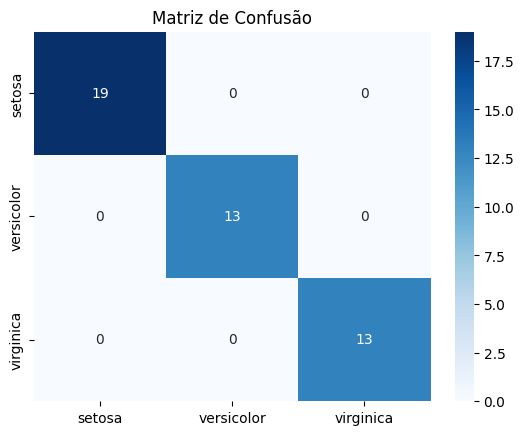

In [ ]:
# Avaliando o modelo
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.show()

## 🔚 Conclusão sobre Árvores de Decisão 🌳

Nesta aula, exploramos profundamente o algoritmo de Árvores de Decisão, uma técnica fundamental no aprendizado supervisionado, usada tanto para classificação quanto para regressão. Vamos destacar os pontos-chave e desafios associados ao uso das Árvores de Decisão:

### 🚀 Pontos-Chave
- **Interpretabilidade:** As árvores de decisão são fáceis de entender e interpretar, o que as torna uma ferramenta valiosa para análise exploratória e tomada de decisão.
- **Flexibilidade:** Podem modelar relações não lineares e interações complexas entre os atributos.

### ❗ Desafios
- **Sobreajuste (Overfitting) 📈:** As árvores de decisão são propensas a sobreajustar, especialmente se forem muito profundas ou se não forem podadas adequadamente.
- **Sensibilidade a Variações nos Dados 💧:** Pequenas alterações nos dados podem resultar em árvores de decisão muito diferentes, o que pode afetar a estabilidade do modelo.

### 📊 Considerações Finais
As árvores de decisão oferecem uma excelente entrada no mundo dos algoritmos de machine learning devido à sua simplicidade e poder. São especialmente úteis quando precisamos de um modelo que possa ser facilmente explicado e justificado. Encorajamos você a continuar explorando diferentes técnicas de poda e ajuste de parâmetros para melhorar a robustez e a eficácia das suas árvores de decisão. Continuem inovando e testando! 🌟

